<a href="https://colab.research.google.com/github/altair08/FYP/blob/main/Prediction_Distilbert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
Device name: Tesla T4


In [2]:
! pip install transformers


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
# Step 1: Install required libraries (if not already installed)
import torch
from transformers import DistilBertModel, DistilBertTokenizer
import pandas as pd

# Step 2: Load the fine-tuned DistilBERT model and tokenizer
model_path = "/content/drive/MyDrive/finetuned_model"
tokenizer_path = "/content/drive/MyDrive/finetuned_distilbert"

model = DistilBertModel.from_pretrained(model_path)
tokenizer = DistilBertTokenizer.from_pretrained(tokenizer_path)

# Step 3: Load and preprocess the dataset
dataset_path = "/content/drive/MyDrive/Dats/reddit data/preprocessed_data.csv"
df = pd.read_csv(dataset_path)


In [15]:
columns_to_keep = ['ID', 'preprocessed_text']
df = df[columns_to_keep]
preprocessed_texts = df['preprocessed_text'].tolist()

In [16]:
# Step 4: Define the class names
class_names = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

# Step 5: Process the preprocessed texts using the tokenizer
inputs = tokenizer(preprocessed_texts, padding=True, truncation=True, return_tensors="pt")

# Step 6: Pass the tokenized inputs through the model to get the predictions
with torch.no_grad():
    model.eval()
    outputs = model(**inputs)
    predicted_logits = outputs.last_hidden_state


In [19]:
# Step 7: Extract the predicted probabilities for each class from the model outputs
predictions = torch.sigmoid(predicted_logits).detach().numpy()
predictions = predictions.reshape(-1, len(class_names))

# Step 8: Create a new DataFrame to store the predicted labels
predicted_labels_df = pd.DataFrame(predictions, columns=class_names)

# Step 9: Apply thresholding to convert probabilities to binary values (0 or 1)
threshold = 0.5
predicted_labels_df = predicted_labels_df.apply(lambda x: x >= threshold).astype(int)

# Step 10: Handle null values in the predicted labels DataFrame
predicted_labels_df = predicted_labels_df.fillna(0)

# Step 11: Merge the predicted labels with the original dataset
df.reset_index(drop=True, inplace=True)  # Reset the index of the original DataFrame
predicted_labels_df.reset_index(drop=True, inplace=True)  # Reset the index of the predicted labels DataFrame

# Step 12: Merge the predicted labels with the original dataset
merged_df = pd.concat([df.iloc[:len(df)], predicted_labels_df.iloc[:len(df)]], axis=1)

# Set the maximum number of rows to display to the original number of rows in the dataset
pd.set_option('display.max_rows', len(df))

# Step 12: Save the merged DataFrame with predicted labels to a new CSV file
merged_df.to_csv("dataset_with_predicted_labels.csv", index=False)
merged_df

,ID,preprocessed_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,y7gz80,ukrainianconflict discussion megathread,0,0,0,0,0,1
1,10e17wq,zelenskyy survive assassination attempt since ...,1,1,0,0,0,0
2,10digs3,first round presidential election czech republ...,0,1,0,1,0,1
3,10dv085,ukrainian recruit train uk year,1,0,0,0,1,0
4,10duei9,zelensky tank apc artillery exactly ukraine ne...,0,0,1,0,0,1
5,10dy1fm,canada send leopard battle tank ukraine yet sa...,0,1,0,0,1,0
6,10dkivs,ukraine also receive unit armor vehicle uk inc...,1,0,1,1,1,0
7,10e5qgx,lithuanian foreign minister way end war send w...,1,0,1,1,0,1
8,10e88qk,belarusian russian flag ban australian open go...,0,0,1,1,1,1
9,10e10wn,european gas price drop per first time since s...,1,1,0,1,1,1


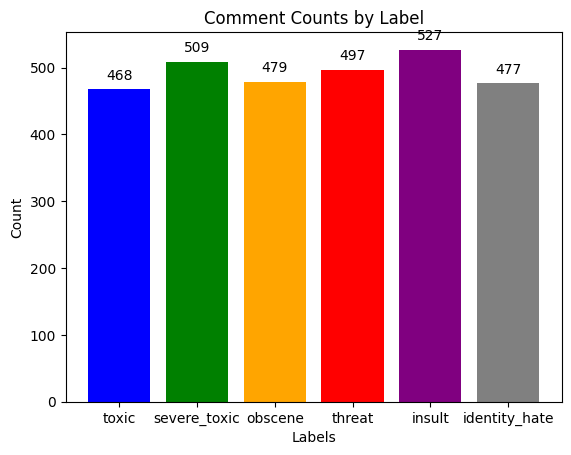

In [23]:
import matplotlib.pyplot as plt

# Calculate the count of comments for each label
label_counts = merged_df[class_names].sum()

# Create a list of colors for the bars
colors = ['blue', 'green', 'orange', 'red', 'purple', 'gray']

# Create a bar chart
plt.bar(class_names, label_counts, color=colors)

# Set the title and labels for the chart
plt.title('Comment Counts by Label')
plt.xlabel('Labels')
plt.ylabel('Count')

# Add the numbers/counts on top of each bar
for i, count in enumerate(label_counts):
    plt.text(i, count + 10, str(count), ha='center', va='bottom')

# Show the chart
plt.show()


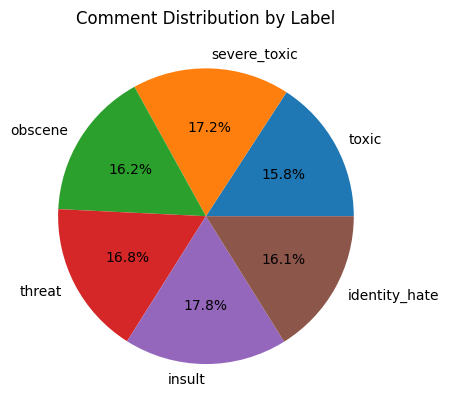

In [22]:
import matplotlib.pyplot as plt

# Calculate the count of comments for each label
label_counts = merged_df[class_names].sum()

# Create a pie chart
plt.pie(label_counts, labels=class_names, autopct='%1.1f%%')

# Set the title for the chart
plt.title('Comment Distribution by Label')

# Show the chart
plt.show()
